In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [7]:
df.info()  # Shows column types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [8]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

In [9]:
print("Unique job categories:", df['Category'].nunique())
print("Category distribution:\n", df['Category'].value_counts())


Unique job categories: 24
Category distribution:
 Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


In [10]:
df.shape

(2484, 4)

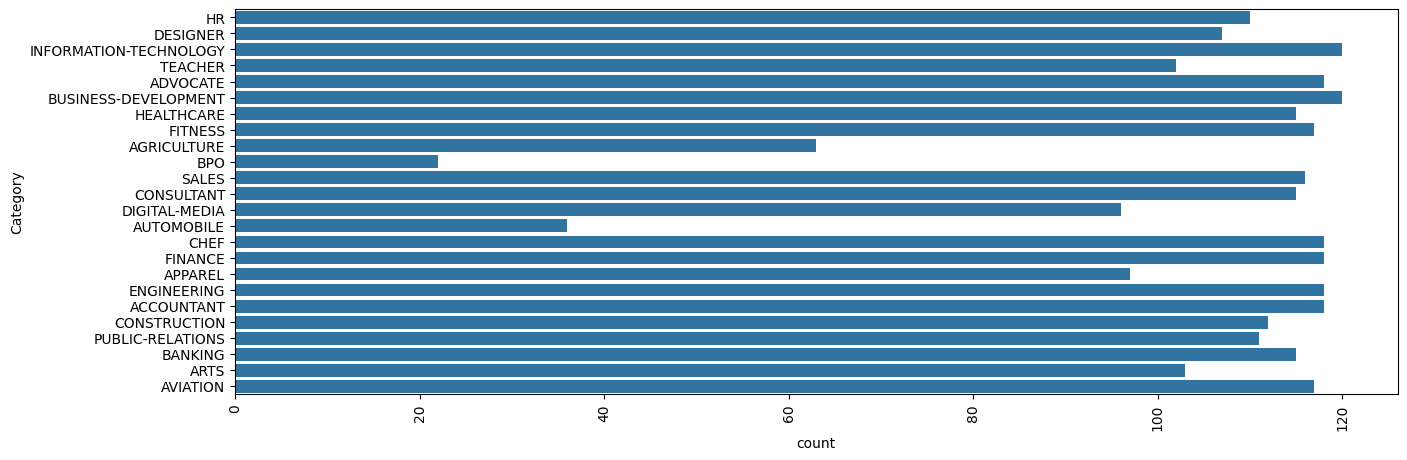

In [11]:
plt.figure(figsize= (15, 5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()


([<matplotlib.patches.Wedge at 0x1f383cacdd0>,
 [Text(1.0873558985304643, 0.16630438939188294, 'HR'),
  Text(0.9879404766659289, 0.483708191542274, 'DESIGNER'),
  Text(0.8001110148396715, 0.7548657920002939, 'INFORMATION-TECHNOLOGY'),
  Text(0.5427552970145121, 0.9567741047722231, 'TEACHER'),
  Text(0.2374045338432916, 1.0740759225076455, 'ADVOCATE'),
  Text(-0.08893988033794423, 1.0963985122597861, 'BUSINESS-DEVELOPMENT'),
  Text(-0.40741943831722166, 1.0217677824639413, 'HEALTHCARE'),
  Text(-0.6887871215943964, 0.8576551178216723, 'FITNESS'),
  Text(-0.9089746228635491, 0.6194878005175475, 'AGRICULTURE'),
  Text(-1.0497142428046182, 0.3287856573105451, 'BPO'),
  Text(-1.099928739161177, 0.012520733497043118, 'SALES'),
  Text(-1.0573112973650307, -0.3034679891920658, 'CONSULTANT'),
  Text(-0.9258571907028171, -0.5939599838574039, 'DIGITAL-MEDIA'),
  Text(-0.7197732137004842, -0.8318212072550673, 'AUTOMOBILE'),
  Text(-0.45983078365386687, -0.9992775642454258, 'CHEF'),
  Text(-0.16630

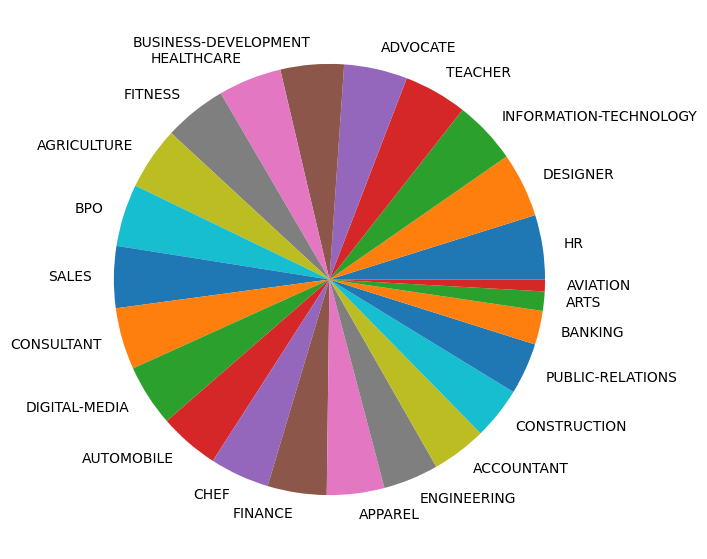

In [12]:
counts = df['Category'].value_counts()
labels= df['Category'].unique()
plt.figure(figsize=(15,7))
plt.pie(counts, labels=labels)

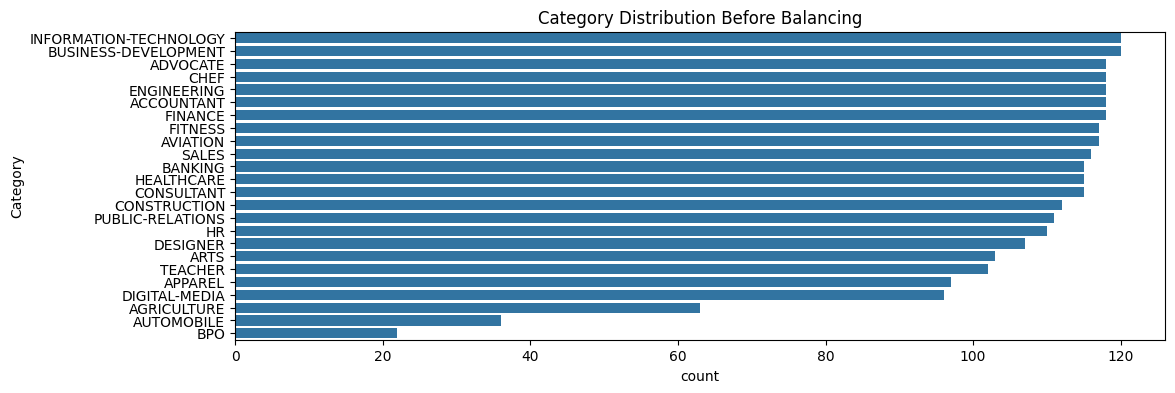

In [13]:
# Before balancing
plt.figure(figsize=(12,4))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Category Distribution Before Balancing')
plt.show()

Original Category Distribution:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
TEACHER                   120
DIGITAL-MEDIA             120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
ENGINEERING               120


C:\Users\Jui\AppData\Local\Temp\ipykernel_21636\3237377081.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category', group_keys=False).apply(lambda x: x.sample(max_size, replace=True))


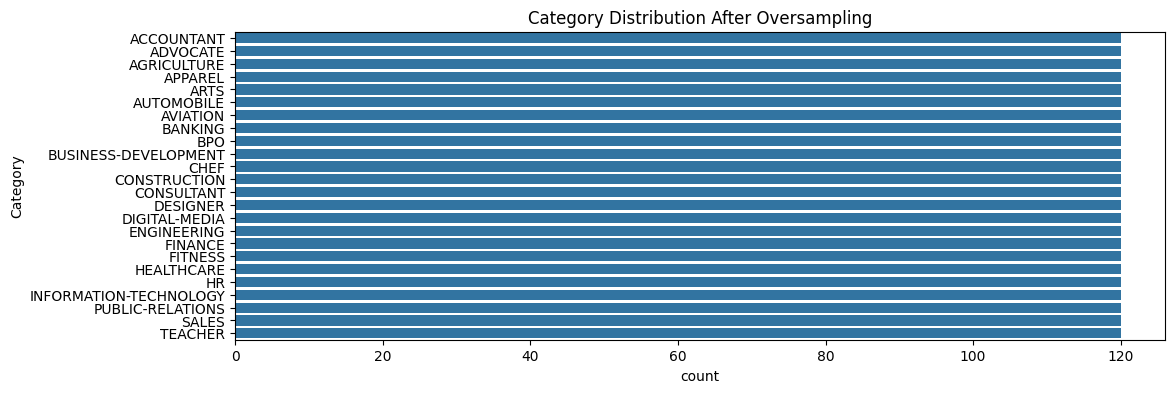

In [14]:
# Check the original category distribution
print("Original Category Distribution:")
print(df['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()

# Perform oversampling
balanced_df = df.groupby('Category', group_keys=False).apply(lambda x: x.sample(max_size, replace=True))
# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())


# After balancing
plt.figure(figsize=(12,4))
sns.countplot(y='Category', data=balanced_df, order=balanced_df['Category'].value_counts().index)
plt.title('Category Distribution After Oversampling')
plt.show()



Cleaning data
URLs
Hashtags
mentions
speial letters
punctuations

In [15]:
import re
import string

def cleanResume(txt):
    # Lowercase
    txt = txt.lower()

    # Remove URLs
    txt = re.sub(r'http\S+|www\S+', ' ', txt)

    # Remove emails, mentions, hashtags
    txt = re.sub(r'\S+@\S+', ' ', txt)
    txt = re.sub(r'@\w+', ' ', txt)
    txt = re.sub(r'#\w+', ' ', txt)

    # Remove HTML tags 
    txt = re.sub(r'<.*?>', ' ', txt)

    # Remove punctuation
    txt = txt.translate(str.maketrans('', '', string.punctuation))

    # Remove non-ASCII characters
    txt = re.sub(r'[^\x00-\x7F]+', ' ', txt)

    # Normalize whitespace
    txt = re.sub(r'\s+', ' ', txt).strip()

    return txt


In [16]:
cleanResume("My website $ link is http://helloworld and access it @gmail.com and #yay")

'my website link is and access it com and'

In [17]:
# Check and rename column safely
if 'Resume_str' in df.columns:
    df.rename(columns={'Resume_str': 'Resume'}, inplace=True)

# Resume Cleaning
from tqdm import tqdm
tqdm.pandas()

df['Resume'] = df['Resume'].progress_apply(cleanResume)

# View a sample
print("\nSample cleaned resume:\n")
print(df['Resume'].sample(1).values[0])


100%|██████████| 2880/2880 [00:03<00:00, 841.96it/s]


Sample cleaned resume:

project construction manager professional summary motivated construction manager highly effective at finding the best methods possible to complete exceptional construction projects strong knowledge of civil engineering principles and concepts construction manager with number years leading teams of general contractors and laborers on large scale residential and commercial construction projects skills excellent customer relations subcontractor management knowledgeable in construction safety fluent in arabicenglish work history project construction manager 012002 to current company name city reviewed plans and specs during the schematic design of preconstruction coordinated utility service providers according to project schedules conducted weekly production and operations contractor meetings which facilitated stronger communication and the ability to resolve critical issues performed regular job site observations to provide direction for all general contractor per

In [18]:
df['Resume']

0       classroom teacher professional summary skilled...
1       senior director product management career over...
2       business development manager experience januar...
3       customer service advocate summary talented cus...
4       clinical engineering manager summary a accompl...
                              ...                        
2875    operations and finance manager summary communi...
2876    system administrator experience 032009 company...
2877    hr personnel assistant summary i am a us citiz...
2878    substitute teacher summary seeking an administ...
2879    detective summary law enforcement professional...
Name: Resume, Length: 2880, dtype: object

words into categorical values

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
le.fit(df['Category'])
# Strip whitespace and prepare label encoder
df['Category'] = df['Category'].astype(str).str.strip()
df['Category'] = df['Category'].str.strip()
df['Category']= le.transform(df['Category'])


In [21]:
df.Category.unique()

array([23, 14,  9,  1, 15,  8,  6, 18, 12,  7,  4, 10, 13,  0, 17,  5,  3,
       20, 21, 11,  2, 22, 16, 19])

Vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=3000,         # Cap the features for efficiency
    ngram_range=(1, 2),         # Use unigrams and bigrams
    min_df=2,                   # Ignore words that appear in only 1 doc
    max_df=0.9                  # Ignore overly common words
)

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])



In [23]:
df

,ID,Resume,Resume_html,Category
0,11943065,classroom teacher professional summary skilled...,"<div class=""fontsize fontface vmargins hmargin...",23
1,24574164,senior director product management career over...,"<div class=""fontsize fontface vmargins hmargin...",14
2,11088337,business development manager experience januar...,"<div class=""fontsize fontface vmargins hmargin...",9
3,97405769,customer service advocate summary talented cus...,"<div class=""fontsize fontface vmargins hmargin...",1
4,17043822,clinical engineering manager summary a accompl...,"<div class=""fontsize fontface vmargins hmargin...",15
...,...,...,...,...
2875,20977412,operations and finance manager summary communi...,"<div class=""fontsize fontface vmargins hmargin...",16
2876,27058381,system administrator experience 032009 company...,"<div class=""fontsize fontface vmargins hmargin...",20
2877,10399912,hr personnel assistant summary i am a us citiz...,"<div class=""fontsize fontface vmargins hmargin...",19
2878,56151548,substitute teacher summary seeking an administ...,"<div class=""fontsize fontface vmargins hmargin...",3


SPLITTING

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [26]:
X_train.shape

(2304, 3000)

In [27]:
X_test.shape

(576, 3000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Prepare data
from scipy.sparse import issparse
X_train_mod = X_train.toarray() if issparse(X_train) else X_train
X_test_mod = X_test.toarray() if issparse(X_test) else X_test

models = [
    (OneVsRestClassifier(LinearSVC()), 'LinearSVC'),
    (OneVsRestClassifier(RandomForestClassifier()), 'RandomForest'),
    (OneVsRestClassifier(MultinomialNB()), 'MultinomialNB')
]
best_acc = 0
best_model = None
best_name = ''

for model, name in models:
    model.fit(X_train_mod, y_train)
    preds = model.predict(X_test_mod)
    acc = accuracy_score(y_test, preds)
    print(f'\n{name} Accuracy: {acc:.4f}')
    print(classification_report(y_test, preds, target_names=le.classes_, zero_division=0))
    if acc > best_acc:
        best_acc = acc
        best_model = model
        best_name = name

# Save the best model
pickle.dump(best_model, open('clf.pkl', 'wb'))
print(f'\nBest model: {best_name} (saved as clf.pkl)')


LinearSVC Accuracy: 0.8733
                        precision    recall  f1-score   support

            ACCOUNTANT       0.67      1.00      0.80        16
              ADVOCATE       0.76      0.70      0.73        23
           AGRICULTURE       0.92      0.83      0.87        29
               APPAREL       1.00      0.82      0.90        28
                  ARTS       0.84      1.00      0.91        21
            AUTOMOBILE       0.88      1.00      0.93        21
              AVIATION       0.96      0.89      0.93        28
               BANKING       0.79      0.86      0.83        22
                   BPO       0.93      1.00      0.96        26
  BUSINESS-DEVELOPMENT       0.93      1.00      0.96        25
                  CHEF       1.00      1.00      1.00        25
          CONSTRUCTION       0.94      1.00      0.97        30
            CONSULTANT       0.85      0.63      0.72        27
              DESIGNER       0.94      0.83      0.88        18
         DI

In [31]:
# 3. Train RandomForestClassifier
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.8750
Confusion Matrix:
[[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  1  0  0  0  1  0  0  1  0  0  0  3  0  0  0  0  0]
 [ 0  3 24  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  2  0  0  0  0  2  0  0  0]
 [ 1  0  0  1  0  0  0 18  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  1 

In [42]:
print('CLEANED TEST RESUME:')
print(cleanResume(test_resume))

CLEANED TEST RESUME:
ananya sharma email phone 919876543210 linkedin linkedincominananyasharma objective detailoriented data analyst with 3 years of experience in data visualization statistical modeling and business intelligence looking to leverage analytics to drive strategic decisions education bachelor of science in statistics university of delhi 2019 certifications google data analytics professional certificate technical skills tools excel tableau power bi sql python pandas numpy matplotlib databases mysql postgresql languages python r concepts hypothesis testing ab testing regression clustering work experience data analyst zeta analytics jul 2021 present developed dashboards in power bi that reduced reporting time by 40 created sqlbased etl pipelines for data cleansing and analysis conducted ab tests to evaluate marketing strategies improving conversion rates by 12 projects customer churn prediction built a machine learning model to predict churn using logistic regression integrat

In [43]:
print('LABEL ENCODER CLASSES:')
print(le.classes_)

LABEL ENCODER CLASSES:
['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'BANKING' 'BPO' 'BUSINESS-DEVELOPMENT' 'CHEF' 'CONSTRUCTION'
 'CONSULTANT' 'DESIGNER' 'DIGITAL-MEDIA' 'ENGINEERING' 'FINANCE' 'FITNESS'
 'HEALTHCARE' 'HR' 'INFORMATION-TECHNOLOGY' 'PUBLIC-RELATIONS' 'SALES'
 'TEACHER']


In [32]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [37]:
def pred(input_resume):
    """
    Predict the category of a given resume text.
    Loads model/vectorizer/encoder from disk if not already loaded.
    Handles empty or invalid input.
    Returns the predicted category name or an error message.
    """
    import os
    import pickle
    import numpy as np

    # Error handling for input
    if not isinstance(input_resume, str) or not input_resume.strip():
        return "Invalid input: Resume text must be a non-empty string."

    # Load model/vectorizer/encoder if not already loaded
    global tfidf, le, best_model
    if 'tfidf' not in globals() or tfidf is None:
        if os.path.exists('tfidf.pkl'):
            tfidf = pickle.load(open('tfidf.pkl', 'rb'))
        else:
            return "Error: tfidf vectorizer not found."
    if 'le' not in globals() or le is None:
        if os.path.exists('encoder.pkl'):
            le = pickle.load(open('encoder.pkl', 'rb'))
        else:
            return "Error: label encoder not found."
    if 'best_model' not in globals() or best_model is None:
        if os.path.exists('clf.pkl'):
            best_model = pickle.load(open('clf.pkl', 'rb'))
        else:
            return "Error: classifier model not found."

    # Clean text
    cleaned_text = cleanResume(input_resume)
    # Vectorize
    vectorized_text = tfidf.transform([cleaned_text])
    # Convert to dense if needed
    input_vector = vectorized_text.toarray()
    # Predict
    pred_label = best_model.predict(input_vector)
    # Decode label
    category = le.inverse_transform(pred_label)[0]
    return category

In [48]:
tricky_resume = """
Amit Verma  
Email: amit.verma@email.com  
Phone: 9876543210  

Objective  
---------
Results-driven professional with experience in financial analysis, sales strategy, and business process automation. Adept at using Excel, Python, and SAP for data-driven decision making.

Education  
---------
MBA, Finance & Marketing, IIM Bangalore, 2020

Experience  
----------
Business Analyst, TechFin Solutions (2020–2023)  
- Analyzed sales data to optimize pricing strategies and increase revenue by 15%  
- Automated monthly financial reporting using Python scripts and Excel macros  
- Collaborated with IT to implement SAP modules for accounting and inventory management  
- Presented financial insights to sales and finance teams

Skills  
------
- Financial modeling  
- Sales analytics  
- Python, Excel, SAP  
- Data visualization  
- Account reconciliation

Achievements  
------------
- Awarded “Best Innovator” for automating sales and finance reports  
- Led cross-functional team for ERP implementation

Languages  
---------
English, Hindi
"""
print(pred(tricky_resume))

FINANCE


In [49]:
pip install streamlit

     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     ----------------------------------- -- 41.0/44.3 kB 960.0 kB/s eta 0:00:01
     ---------------------------------------- 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.1 MB ? eta -:--:--
    --------------------------------------- 0.2/10.1 MB 3.5 MB/s eta 0:00:03
    --------------------------------------- 0.2/10.1 MB 2.5 MB/s eta 0:00:04
   - -------------------------------------- 0.3/10.1 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.3/10.1 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.1 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.1 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.1 MB 1.6 MB/s eta 0:00:07
   -- -------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Jui\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
